### Select the Right Threshold values using ROC Curve

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [18]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [19]:
X.shape

(2000, 20)

In [20]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [23]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9835277777777778


In [24]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.24, 0.76]])

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [28]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9853111111111111


In [29]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.56,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [30]:
final_prediction

0      0.885262
1      0.115823
2      0.818783
3      0.747853
4      0.557447
         ...   
595    0.126340
596    0.117845
597    0.879197
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [31]:
#### Calculate the ROc Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90373256, 0.90327475, 0.80743823,
       0.80662833, 0.79836092, 0.7980558 , 0.78880736, 0.78821156,
       0.7583411 , 0.75537124, 0.73430851, 0.73387362, 0.71425756,
       0.71393711, 0.66506113, 0.66243537, 0.60029968, 0.59486186,
       0.5921569 , 0.59114346, 0.58827749, 0.57925354, 0.57896627,
       0.57550386, 0.56792732, 0.56469563, 0.53845371, 0.52127948,
       0.51865858, 0.50366892, 0.4471034 , 0.39214628, 0.38379719,
       0.35268074, 0.34836612, 0.24154122, 0.24146893, 0.2396341 ,
       0.23390421, 0.19666474, 0.19598417, 0.12603296, 0.1253351 ,
       0.10498954])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
32,0.447103,0.961667
31,0.503669,0.958333
30,0.518659,0.956667
29,0.521279,0.956667
28,0.538454,0.956667


In [37]:
accuracy_ls

,thresholds,accuracy
32,0.447103,0.961667
31,0.503669,0.958333
30,0.518659,0.956667
29,0.521279,0.956667
28,0.538454,0.956667
23,0.579254,0.951667
27,0.564696,0.951667
25,0.575504,0.951667
22,0.588277,0.950000
33,0.392146,0.950000


In [38]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

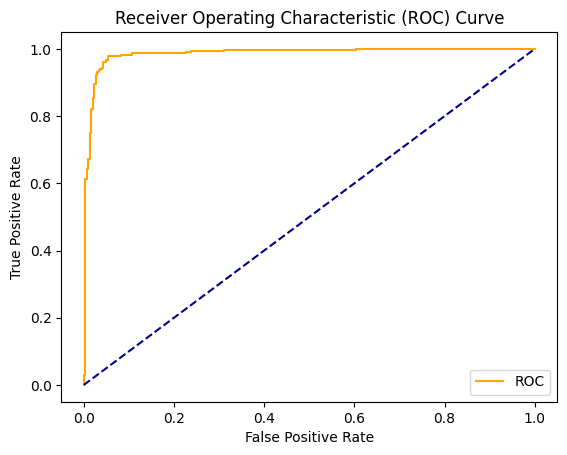

In [40]:
plot_roc_curve(fpr,tpr)